# Importing Libraries

In [1]:
#data preprocessing
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#Algorithms
#data preprocessing
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#Algorithms
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn import model_selection 
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import metrics  
from sklearn.preprocessing import StandardScaler,LabelEncoder



import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
careva=pd.read_csv('car.data',names=['Buying','maint','doors','persons','lug_boot','safety','decision'])

In [3]:
careva.head()

,Buying,maint,doors,persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
careva.shape

(1728, 7)

# Statistical Description

In [5]:
careva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
Buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
decision    1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


every feature is in object format

In [6]:
careva.describe()

,Buying,maint,doors,persons,lug_boot,safety,decision
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,5more,more,big,low,unacc
freq,432,432,432,576,576,576,1210


In [7]:
careva.isnull().sum()

Buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
decision    0
dtype: int64

It's clear that there is no null data present in this dataset.

# Exploratory Data Analysis

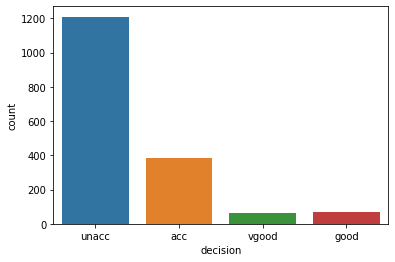

In [8]:
sns.countplot(careva['decision'])

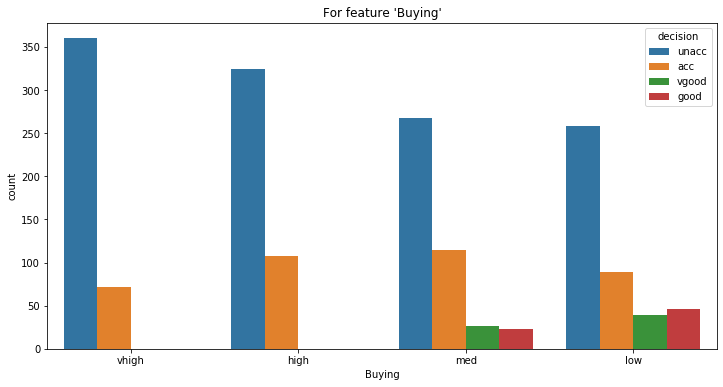

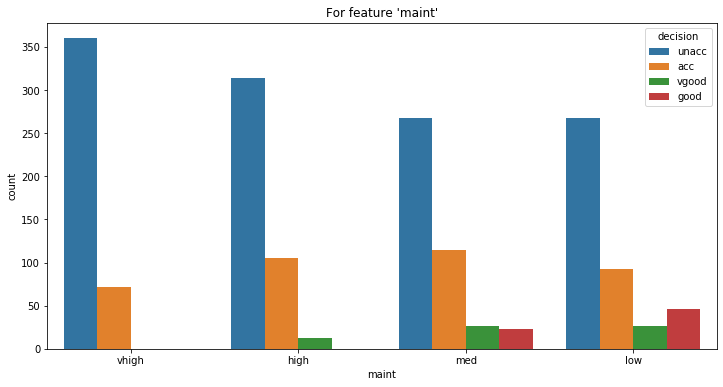

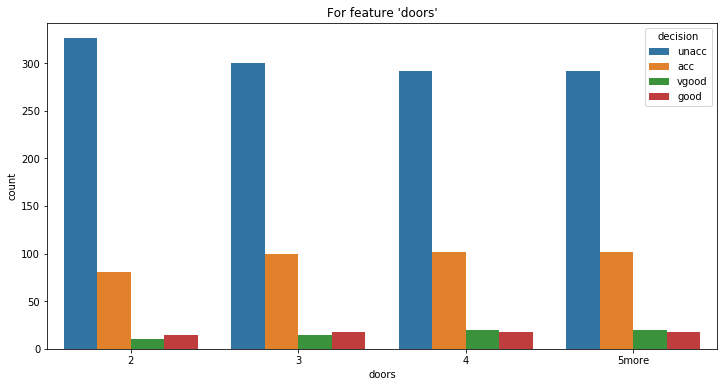

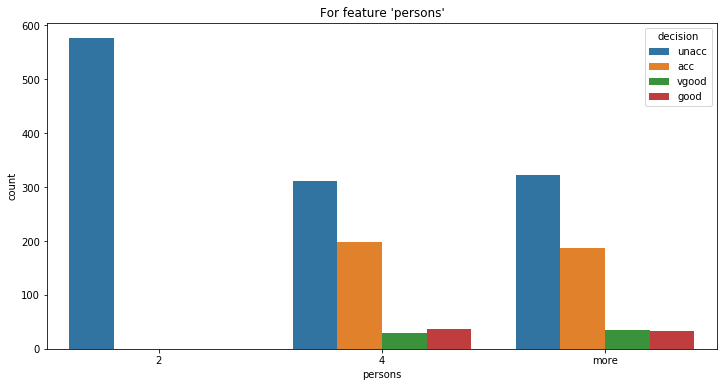

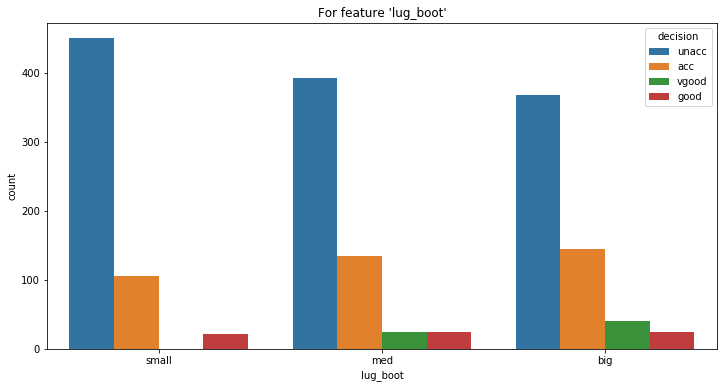

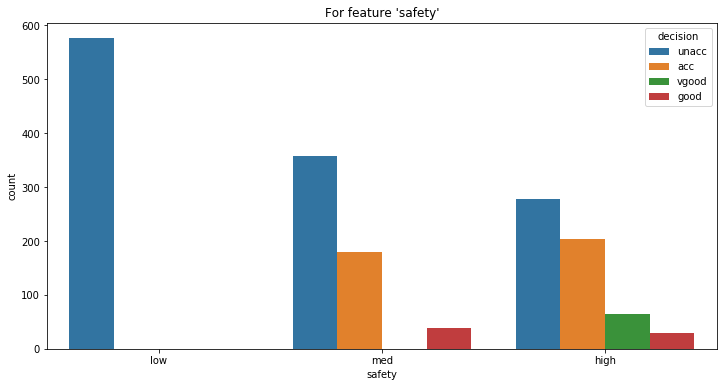

In [9]:
for i in careva.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(careva[i],hue=careva['decision'])

# Feature Engineering

In [10]:
le=LabelEncoder()
list=['Buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'decision']
for val in list:
    careva[val]=le.fit_transform(careva[val].astype(str))

In [11]:
#let's check data
careva.head()

,Buying,maint,doors,persons,lug_boot,safety,decision
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


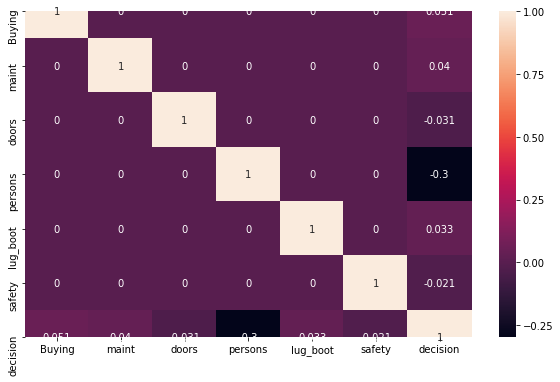

In [12]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(careva.corr(),annot=True)

From here we can observe that persons is weak cor-relation with decision

# Splitting the Data

In [13]:
x=careva.iloc[:,:-1]
x.head()

,Buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [14]:
y=careva.iloc[:,-1]
y.head()

0    2
1    2
2    2
3    2
4    2
Name: decision, dtype: int32

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [16]:
x_train.shape

(1209, 6)

In [17]:
y_train.shape

(1209,)

In [18]:
x_test.shape

(519, 6)

In [19]:
y_test.shape

(519,)

In [20]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()

In [21]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Applying Machine Learning Algorithms

In [22]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()


************** DecisionTreeClassifier ***********


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


accuracy score 0.9710982658959537
Cross-val-score= 0.867892763814238


              precision    recall  f1-score   support

           0       0.93      0.94      0.94       118
           1       0.75      0.95      0.84        19
           2       1.00      0.99      0.99       358
           3       1.00      0.88      0.93        24

    accuracy                           0.97       519
   macro avg       0.92      0.94      0.93       519
weighted avg       0.97      0.97      0.97       519



[[111   6   1   0]
 [  1  18   0 

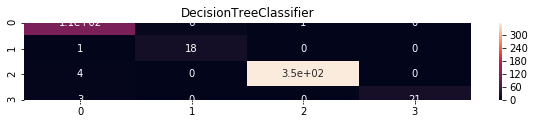

************** RandomForestClassifier ***********


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


accuracy score 0.9614643545279383
Cross-val-score= 0.835988785280868


              precision    recall  f1-score   support

           0       0.90      0.93      0.92       118
           1       0.74      0.74      0.74        19
           2       0.99      0.99      0.99       358
           3       1.00      0.88      0.93        24

    accuracy                           0.96       519
   macro avg       0.91      0.88      0.89       519
weigh

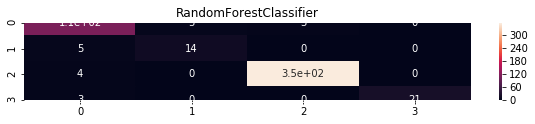

************** KNeighborsClassifier ***********


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


accuracy score 0.9113680154142582
Cross-val-score= 0.7393739796862571


              precision    recall  f1-score   support

           0       0.79      0.84      0.81       118
           1       0.90      0.47      0.62        19
           2       0.96      0.98      0.97       358
           3       0.81      0.54      0.65        24

    accuracy                           0.91       519
   macro avg       0.87      0.71      0.76       519
weighted avg       0.91      0.91      0.91       519



[[ 99   0  16   3]
 [ 10   9   0   0]
 [  6   0 352   0]
 [ 10   1   0  13]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


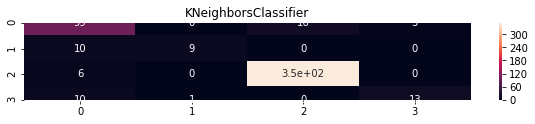

************** SGDClassifier ***********


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


accuracy score 0.6570327552986512
Cross-val-score= 0.6800402709395427


              precision    recall  f1-score   support

           0       0.33      0.35      0.34       118
           1       0.00      0.00      0.00        19
           2       0.76      0.84      0.80       358
           3       0.00      0.00      0.00        24

    accuracy                           0.66       519
   macro avg       0.27      0.30      0.28       519
weighted avg       0.60      0.66      0.63       519



[[ 41   2  75   0]
 [ 

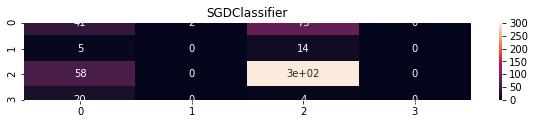

************** LogisticRegression ***********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy score 0.6685934489402697
Cross-val-score= 0.6621069378664425


              precision    recall  f1-score   support

           0       0.32      0.19      0.24       118
           1       0.00      0.00      0.00        19
           2       0.72      0.91      0.80       358
           3       0.00      0.00      0.00        24

    accuracy                           0.67       519
   macro avg       0.26      0.27      0.26       519
weighted avg       0.57      0.67      0.61       519



[[ 23   0  95   0]
 [  2   0  17   0]
 [ 34   0 324   0]
 [ 13   0  11   0]]


AxesSubplot(0.125,0.808774;0.62x0.071

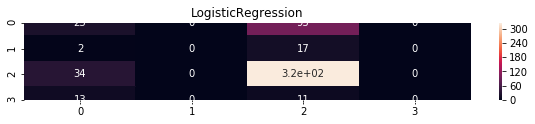

In [23]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))



#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv=model_selection.cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.show()

In [24]:
result=pd.DataFrame({'Model':Model,'cvs':cvs,'score':score},columns=['Model','cvs','score'])
result

,Model,cvs,score
0,DecisionTreeClassifier,86.789276,97.109827
1,RandomForestClassifier,83.598879,96.146435
2,KNeighborsClassifier,73.937398,91.136802
3,SGDClassifier,68.004027,65.703276
4,LogisticRegression,66.210694,66.859345


# Hyper_Parameter_Tuning

In [25]:
param_grid ={'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf']}
from sklearn.model_selection import GridSearchCV, cross_val_score
dtc= DecisionTreeClassifier( random_state=1)
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(x_train, y_train)
grid.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.703, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.703, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.708, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.703, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.703, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.708, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.703, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.703, total=   0.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.708, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.703, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    3.4s finished


{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [26]:
grid_predictions=grid.predict(x_test)
grid_predictions

array([2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 3,
       2, 0, 0, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 3, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 3, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       2, 1, 3, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2,

In [27]:
score=accuracy_score(y_test,grid_predictions)
score

0.9826589595375722

In [28]:
cn=confusion_matrix(y_test,grid_predictions)
cn

array([[111,   3,   4,   0],
       [  1,  18,   0,   0],
       [  0,   0, 358,   0],
       [  1,   0,   0,  23]], dtype=int64)

# Predicting Values

In [29]:
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('predicted insurance claim:',pred)
print('actual insurance claim',y_test)

predicted insurance claim: [2 0 2 0 2 0 2 2 2 2 0 0 0 2 2 2 2 2 2 0 2 0 0 2 0 2 2 2 2 2 0 2 2 2 0 0 1
 2 2 2 2 2 0 0 1 0 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 0 2 2 0 3 2 0 0 2 2 2 2 2
 1 1 2 2 2 2 3 2 2 0 3 0 2 0 1 0 2 1 2 2 2 1 2 2 2 0 2 2 2 2 1 1 0 2 2 0 2
 2 2 2 2 0 1 2 2 2 2 3 2 0 0 2 1 2 2 2 2 2 0 2 2 0 2 3 2 2 2 0 0 0 2 0 2 2
 2 2 0 3 2 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 0 3 0 2 0 2 2 0 2 2 2 2 0 2 2 2 1
 0 2 2 0 2 2 2 0 2 2 2 2 0 2 2 2 2 2 1 2 2 2 1 2 2 2 2 0 2 2 0 2 2 2 1 3 2
 2 0 2 2 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 0 2 2 2 2 2 0 3 2 2 2 0 2 2 3 2 2 0 0 2 0 2 0 0 2 2 0 1 3 0 0 2 2 2 2 3
 0 0 2 2 2 2 3 2 2 2 2 0 2 2 3 0 0 2 2 0 0 0 2 0 0 2 2 2 2 2 2 0 2 2 2 2 0
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 3 2 2 2 2 0 2 0 2 2 2 0
 2 0 1 3 2 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 0 2 0 2 2 2 2 2 0 2 2 2 2 2 2 0 2
 2 3 2 0 2 2 0 0 2 3 2 0 2 1 2 0 0 2 2 0 2 0 2 1 2 2 2 2 0 0 0 2 0 2 0 2 2
 0 1 2 0 0 0 2 3 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2 2 2 0 2 2 3 2 

# Saving Model

In [30]:
carevc=pd.DataFrame(pred)
carevc.to_csv('dtc_carevc.csv')

In [31]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(rfc,'carevc.obj')
#load the model from a file
dct_from_joblib=joblib.load('carevc.obj')
#use the loaded model to make prediction
dct_from_joblib.predict(x_test)

array([2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 3,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 3, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 3, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1,
       3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 3, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2,